In [56]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "jky05crjZ1tmjRb4D8UzBRtC1"
consumer_secret = "TcwVytQsAgCmufhRmy1pli9AWJUT9Hr5RA0aa4n3G1PYLB8E56"
access_token = "4342151714-JZAl6nPMOeLYvKEzoV1biRzO0nwuf8ZQREzGDfM"
access_token_secret = "XSpdANMzC20mhwen3sZHEEpL8gPan4qR6tuAq14TqYIim"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

** First step is to get last 100 tweets from the 5 media sources.  I just copied the same process over 5 times and changed out the target user.  Would be more eloquent and efficient to loop through a list.  I didn't have time to get that to work.  **

In [57]:
# Target Account
target_user = "@Foxnews"



# Counter
counter = 1

# Variables for holding sentiments
Foxsentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=(x+1))

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        Foxsentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweets_ago})

        # Add to counter 
        counter = counter + 1



In [58]:
# Target Account
target_user = "@CNN"



# Counter
counter = 1

# Variables for holding sentiments
CNNsentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=(x+1))

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        CNNsentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweets_ago})

        # Add to counter 
        counter = counter + 1



In [59]:
# Target Account
target_user = "@BBC"



# Counter
counter = 1

# Variables for holding sentiments
BBCsentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=(x+1))

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        BBCsentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweets_ago})

        # Add to counter 
        counter = counter + 1



In [60]:
# Target Account
target_user = "@CBS"



# Counter
counter = 1

# Variables for holding sentiments
CBSsentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=(x+1))

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        CBSsentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweets_ago})

        # Add to counter 
        counter = counter + 1



In [61]:
# Target Account
target_user = "@NYTimes"



# Counter
counter = 1

# Variables for holding sentiments
NYTsentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=(x+1))

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        NYTsentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweets_ago})

        # Add to counter 
        counter = counter + 1



** Now convert to DataFrames. **

In [62]:
# Convert sentiments to DataFrame
CNNsentiments_pd = pd.DataFrame.from_dict(CNNsentiments)
Foxsentiments_pd = pd.DataFrame.from_dict(Foxsentiments)
BBCsentiments_pd = pd.DataFrame.from_dict(BBCsentiments)
CBSsentiments_pd = pd.DataFrame.from_dict(CBSsentiments)
NYTsentiments_pd = pd.DataFrame.from_dict(NYTsentiments)
Foxsentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.5994,Thu Dec 14 20:46:32 +0000 2017,0.642,0.358,0.000,1
1,0.0000,Thu Dec 14 20:36:52 +0000 2017,1.000,0.000,0.000,2
2,0.0000,Thu Dec 14 20:31:48 +0000 2017,1.000,0.000,0.000,3
3,0.0000,Thu Dec 14 20:28:20 +0000 2017,1.000,0.000,0.000,4
4,0.0000,Thu Dec 14 20:27:58 +0000 2017,1.000,0.000,0.000,5
5,-0.7351,Thu Dec 14 20:26:41 +0000 2017,0.575,0.362,0.063,6
6,0.0000,Thu Dec 14 20:23:07 +0000 2017,1.000,0.000,0.000,7
7,-0.2960,Thu Dec 14 20:18:22 +0000 2017,0.694,0.306,0.000,8
8,0.4215,Thu Dec 14 20:15:05 +0000 2017,0.826,0.000,0.174,9
9,0.0258,Thu Dec 14 20:12:56 +0000 2017,0.692,0.151,0.157,10


** Next - I add another column - the absolute value of the compound sentiment.  This is a measure of extremity.  Higher number implies a more extreme post (positive or negative).  **

In [73]:
CNNsentiments_pd['Magnitude'] = CNNsentiments_pd['Compound'].abs()
Foxsentiments_pd['Magnitude'] = Foxsentiments_pd['Compound'].abs()
BBCsentiments_pd['Magnitude'] = BBCsentiments_pd['Compound'].abs()
CBSsentiments_pd['Magnitude'] = CBSsentiments_pd['Compound'].abs()
NYTsentiments_pd['Magnitude'] = NYTsentiments_pd['Compound'].abs()
CNNsentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,Magnitude
0,0.5106,Thu Dec 14 20:46:41 +0000 2017,0.706,0.082,0.212,1,0.5106
1,-0.3612,Thu Dec 14 20:29:17 +0000 2017,0.889,0.111,0.000,2,0.3612
2,-0.4019,Thu Dec 14 20:07:56 +0000 2017,0.812,0.188,0.000,3,0.4019
3,0.0000,Thu Dec 14 20:00:01 +0000 2017,1.000,0.000,0.000,4,0.0000
4,-0.2732,Thu Dec 14 19:56:58 +0000 2017,0.905,0.095,0.000,5,0.2732
5,0.1531,Thu Dec 14 19:44:10 +0000 2017,0.922,0.000,0.078,6,0.1531
6,0.0000,Thu Dec 14 19:43:00 +0000 2017,1.000,0.000,0.000,7,0.0000
7,0.5106,Thu Dec 14 19:39:08 +0000 2017,0.765,0.000,0.235,8,0.5106
8,0.0000,Thu Dec 14 19:34:44 +0000 2017,1.000,0.000,0.000,9,0.0000
9,-0.6705,Thu Dec 14 19:30:13 +0000 2017,0.816,0.184,0.000,10,0.6705


** First I plot a separate graph for Magnitude AND Polarity for each of the 5 media sources individually.  I do this to be able to view each source individually - without clutter.  Just another lense.  **

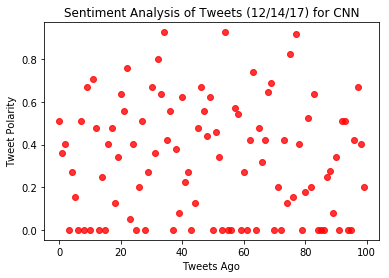

In [75]:
# Create plot
plt.plot(np.arange(len(CNNsentiments_pd["Magnitude"])),
         CNNsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="red")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for CNN" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** CNN tweets usually have an absolute value of less than 0.6.  Only a few tweets above 0.8 and nothing in this range since approximately 40 tweets ago. **

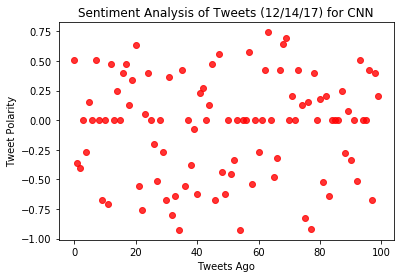

In [76]:
# Create plot
plt.plot(np.arange(len(CNNsentiments_pd["Compound"])),
         CNNsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="red")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for CNN" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** CNN has a fairly even number of positive and negative tweets.  The most extreme tweets (absolute value > 0.8) are all negative.  IE the most negative tweets are more extreme than the most positive tweets from CNN.  **

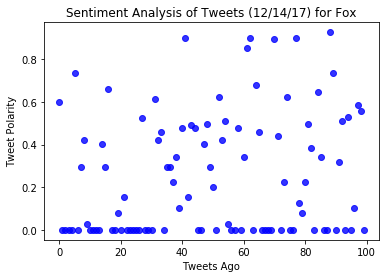

In [77]:
# Create plot
plt.plot(np.arange(len(Foxsentiments_pd["Compound"])),
         Foxsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="blue")


# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for Fox" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** Like with CNN - tweets that are generally under 0.8.  For Fox - unlike CNN - there were a group of exreme tweets between 60 and 100 tweets ago.  There hasn't been an extreme tweet in 40 tweets.  For CNN they were more spread out and some appeared more recent (by tweets ago count). **

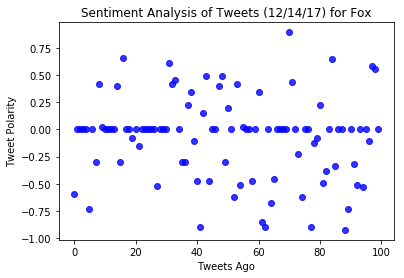

In [64]:
# Create plot
plt.plot(np.arange(len(Foxsentiments_pd["Compound"])),
         Foxsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="blue")


# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for Fox" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** Generally evenly distributed by count between positive and negative sentiment.  Like CNN, the most extreme posts were negative.  **

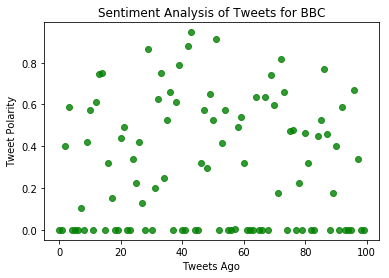

In [88]:
# Create plot
plt.plot(np.arange(len(BBCsentiments_pd["Compound"])),
         BBCsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color = "green")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets for BBC")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

**BBC has very few tweets above 0.8.  Less than Fox or CNN.  None since approximately 40 tweets ago.  **

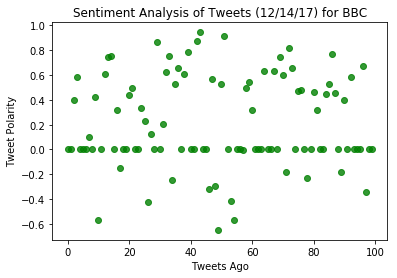

In [90]:
# Create plot
plt.plot(np.arange(len(BBCsentiments_pd["Compound"])),
         BBCsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color = "green")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for BBC" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** BBC has substantially more positive tweets than negative tweets.  The most extreme of the BBC tweets are postive.  This is unlike CNN or Fox.  **

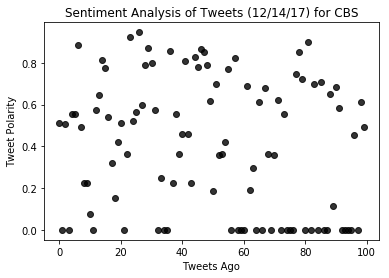

In [91]:
# Create plot
plt.plot(np.arange(len(CBSsentiments_pd["Compound"])),
         CBSsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="black")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for CBS" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** CBS has a larger proportion of tweets with magnitude > 0.8 than the other outlets reviewed so far. **

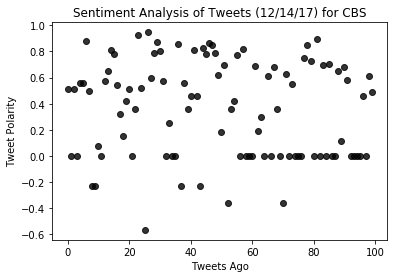

In [92]:
# Create plot
plt.plot(np.arange(len(CBSsentiments_pd["Compound"])),
         CBSsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="black")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for CBS" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** CBS has a sentiment profile very similar to the BBC.  Very postive, and the most extreme of their tweets are postive. **

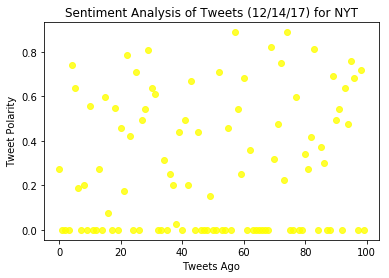

In [93]:
# Create plot
plt.plot(np.arange(len(NYTsentiments_pd["Compound"])),
         NYTsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="yellow")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for NYT" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** NYT rarely tweets more extreme than 0.8.  The few tweets that have been that exreme have been nearly 60 tweets ago - so nothing extreme in any recent tweets. **

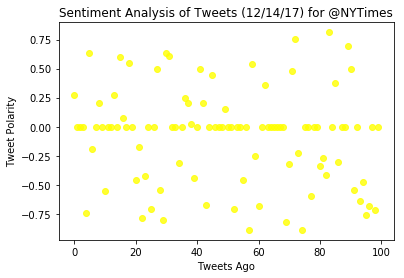

In [67]:
# Create plot

plt.plot(np.arange(len(NYTsentiments_pd["Compound"])),
         NYTsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="yellow")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

** NY Times has slightly more negative than positive tweets.  The difference is less pronounced more recently. Also more of mix between positive and negative in the extreme tweets compared to the other media outlets. **

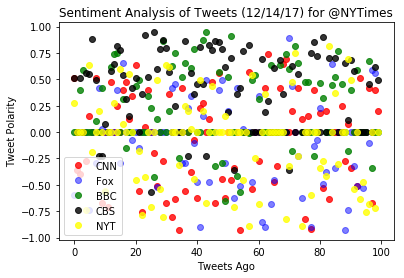

In [84]:
# Create plot
plt.plot(np.arange(len(CNNsentiments_pd["Compound"])),
         CNNsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="red",label="CNN")

plt.plot(np.arange(len(Foxsentiments_pd["Compound"])),
         Foxsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.5,color = "blue",label="Fox")

plt.plot(np.arange(len(BBCsentiments_pd["Compound"])),
         BBCsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color = "green",label="BBC")

plt.plot(np.arange(len(CBSsentiments_pd["Compound"])),
         CBSsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="black",label="CBS")

plt.plot(np.arange(len(NYTsentiments_pd["Compound"])),
         NYTsentiments_pd["Compound"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="yellow",label="NYT")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(handles=[CNN_plot, Fox_plot, BBC_plot, CBS_plot, NYT_plot], loc="best")
plt.show()

** Confirms insights from prior graphs.  One that jumps out the most is the high number of positive CBS tweets. **

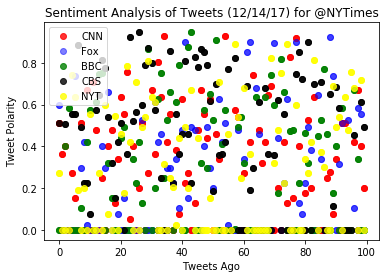

In [83]:
# Create plot
CNN_plot, = plt.plot(np.arange(len(CNNsentiments_pd["Compound"])),
         CNNsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="red",label = "CNN")

Fox_plot, = plt.plot(np.arange(len(Foxsentiments_pd["Compound"])),
         Foxsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.5,color = "blue", label = "Fox")

BBC_plot, = plt.plot(np.arange(len(BBCsentiments_pd["Compound"])),
         BBCsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color = "green", label = "BBC")

CBS_plot, = plt.plot(np.arange(len(CBSsentiments_pd["Compound"])),
         CBSsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="black",label = "CBS")

NYT_plot, = plt.plot(np.arange(len(NYTsentiments_pd["Compound"])),
         NYTsentiments_pd["Magnitude"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8,color="yellow",label = "NYT")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(handles=[CNN_plot, Fox_plot, BBC_plot, CBS_plot, NYT_plot], loc="best")
plt.show()

** Also confirming prior graphs.  CBS has a fair number of the extreme tweets.  Most common tweet polarity value is 0.  **